# Quantum Mechanics Practical Exam - 2023

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Question Paper

Solve the s-wave Schrodinger equation,
$$ \frac{d^2\psi}{dr^2} = A(r)\psi(r) $$
where, $ A(r) = \frac{2m}{\hbar^2}\left[V(r)-E \right] $. Different potentials $V(r)$ are given in the following questions with needed constants.

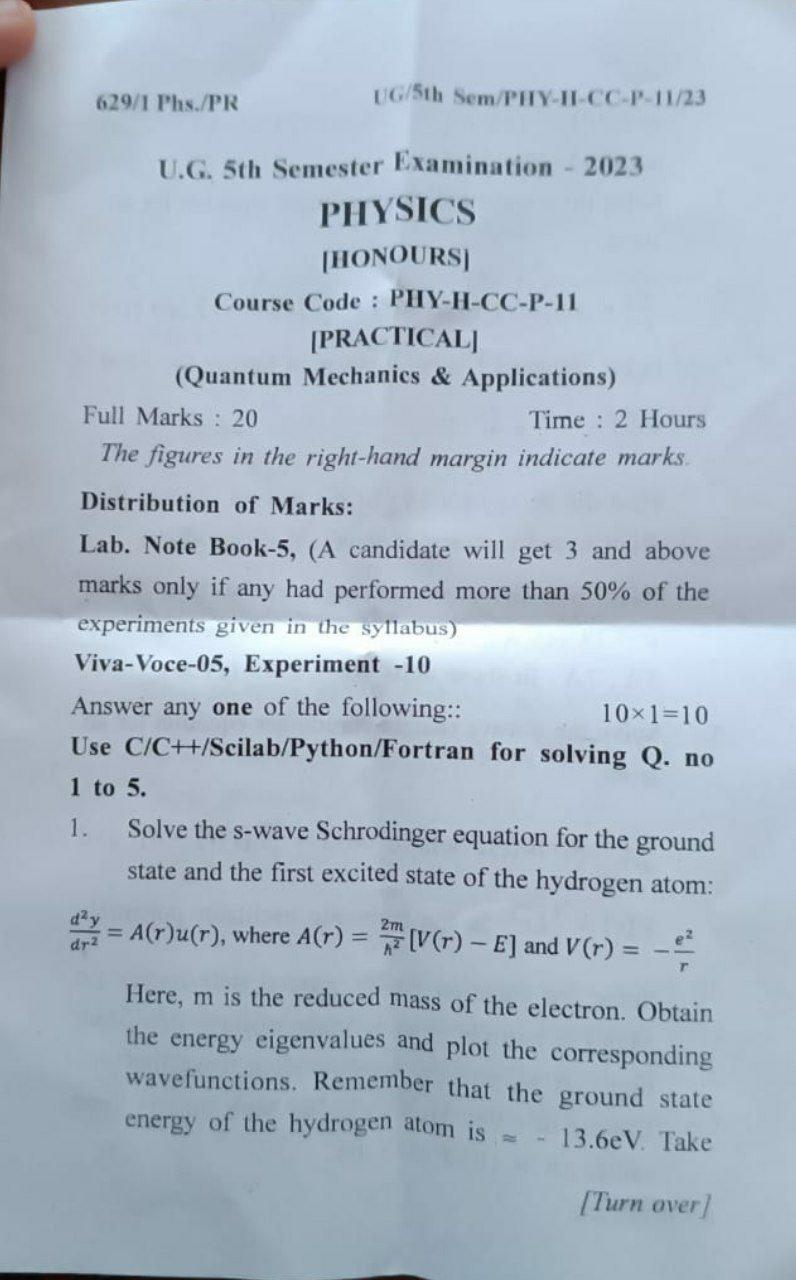

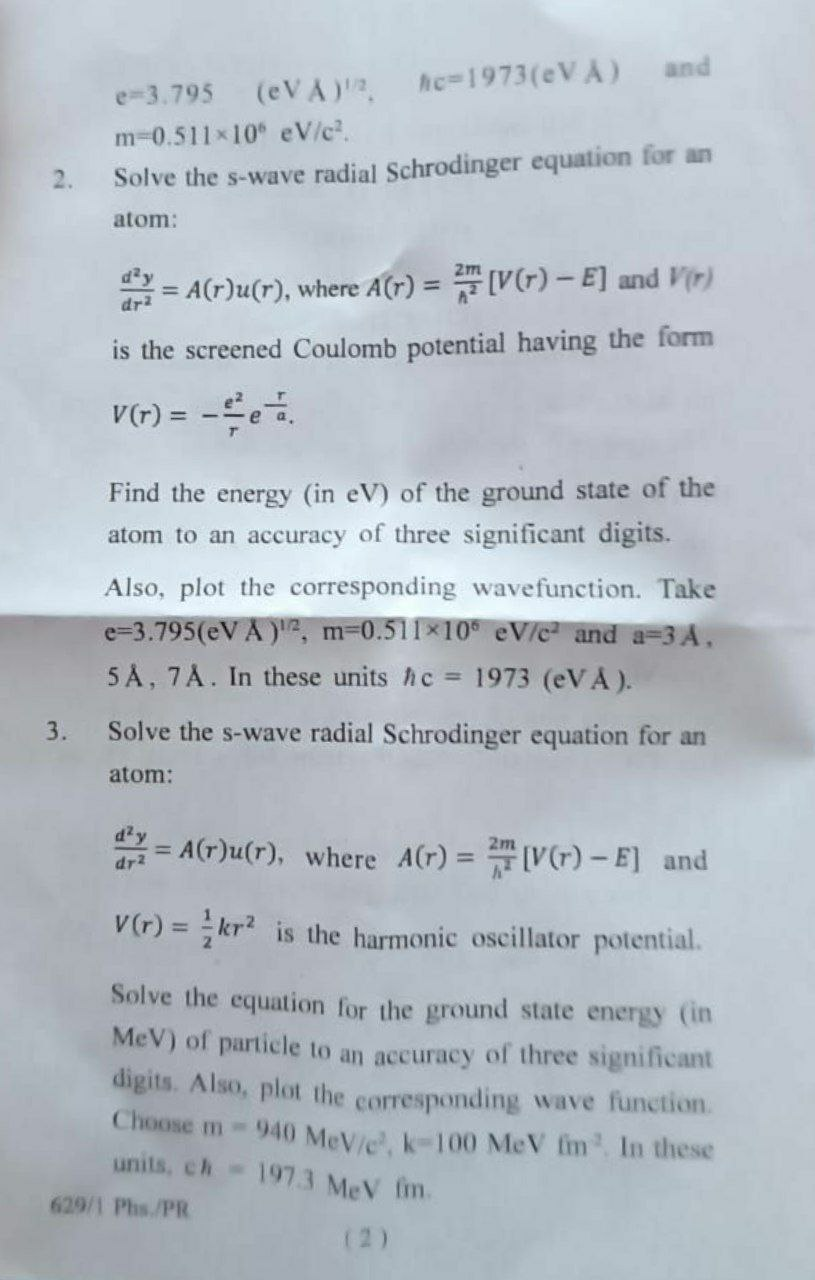

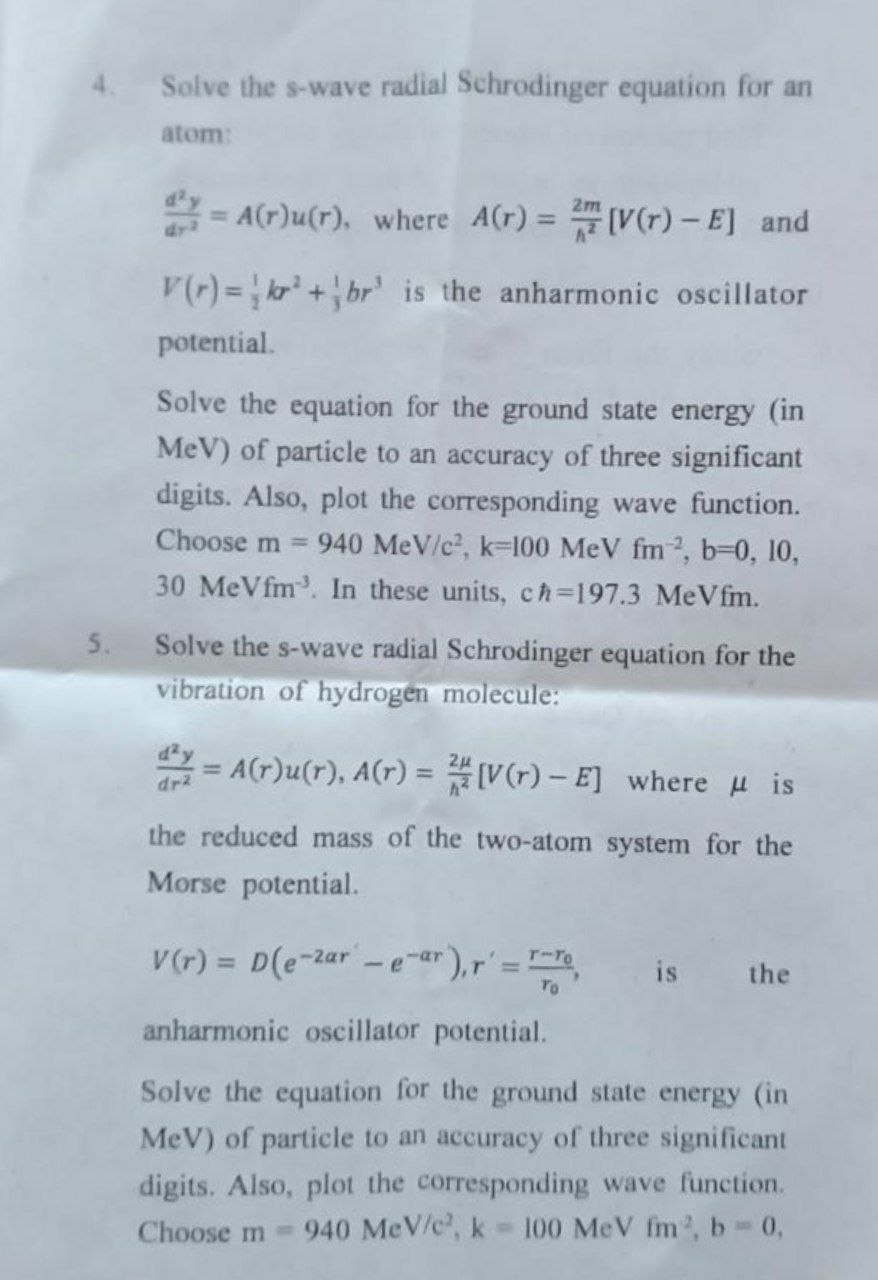

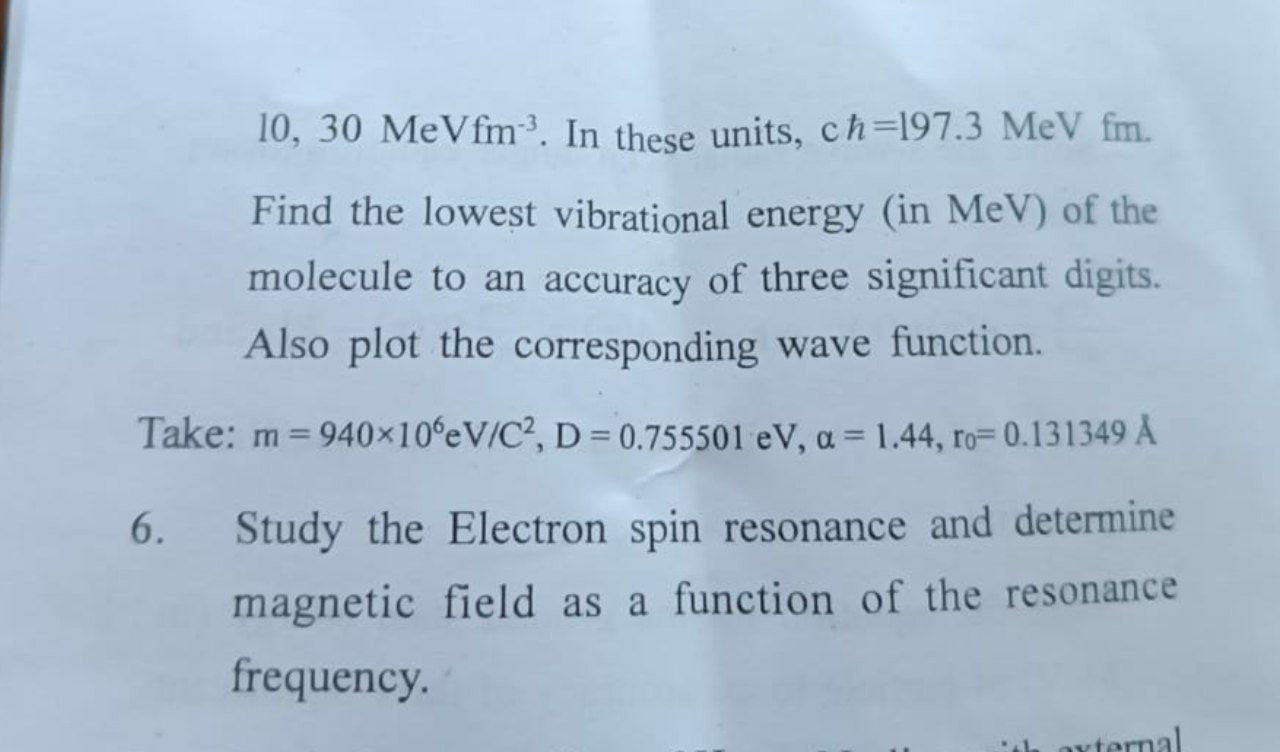

In [92]:
for i in range(1,5):
    display(Image(filename=f'sem_questions_2023/page{i}.jpg'))

## Numerical solution by Central Difference method

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

**Algorithm:**

1. Define $p(x),q(\lambda,x),r(x)$.
2. x array and y array
3. h = dx = x[1] - x[0]
4. N = len(x)
5. Write $a,b,c,d$ and $y_i$ for i in range(N).

$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

In [94]:
def prop_central_diff(pr, p, q, r, x, y, dx):
    '''
    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    '''
    N = len(x)
    yy = [y[i] for i in range(N)]
    for i in range(2, N):
        a = 2 + dx**2 *q(pr, x[i-1])
        b = -(1 + dx/2 *p(x[i-1]))
        c = dx**2 *r(x[i-1])
        d = 1 - dx/2 *p(x[i-1])
        yy[i] = a/d *yy[i-1] + b/d *yy[i-2] + c/d
    return yy

### Normalization

In [95]:
def psiNorm(psi, dx):
    N = len(psi)
    psi2 = [psi[i]**2 for i in range(N)]
    psi2arr = np.array(psi2)
    psimod2 = np.sum(psi2arr*dx)
    norm_psi = np.array(psi)/(psimod2)**0.5
    return norm_psi

### Determination of eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr)`**

In [96]:
def center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr):
    '''
    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    '''
    N = int((xN -x0)/dx)
    dx = (xN -x0)/N
    x = [x0 +i*dx for i in range(N+1)]
    y = [0 for i in range(N+1)]
    y[0], y[1], y[N] = y0, y1, yN
    itr = 0
    while abs(pr_max - pr_min) >  tol and itr < max_itr:
        pr = 0.5 *(pr_min + pr_max)  # bisection method
        yy = prop_central_diff(pr, p, q, r, x, y, dx)
        cnt = 0  # count
        for i in range(1, N-2):
            if yy[i]*yy[i+1] < 0:
                cnt += 1
        if cnt > nodes:
            pr_max = pr
        elif cnt < nodes:
            pr_min = pr
        else:
            if yy[N-1] > yN:
                pr_min = pr
            elif yy[N-1] < yN:
                pr_max = pr
            itr += 1
    if itr < max_itr:
        return pr, x, yy
    else:
        return None, None, None

## Question 1
$$ V(r) = -\frac{e^2}{r} $$

Given constants,
- $m = 0.511\times 10^{6} \, eV/c^2 $
- $\hbar c = 1973 \, eV\, Å $
- $ e = 3.795 \, (eV\, Å)^{1/2} $

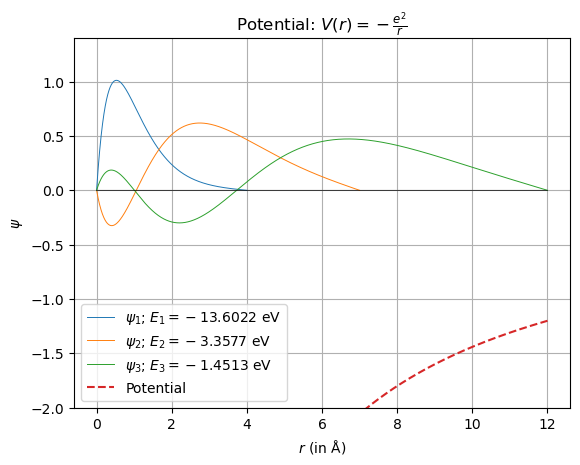

In [97]:
# E0 = 13.6 eV -- is to be calculated
e = 3.795  # rt(eV Å)
hc = 1973   # eV Å
m = 0.511e6  # eV/c2

Ac = 2*m/hc**2
def V(r):
    return -e**2/r
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 1e-4, 0, [4,7,12], 0

for nodesn in range(3):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-5
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; $E_{nodesn+1} = {E:.4f}$ eV',lw=0.7)
plt.xlabel('$r$ (in Å)')
plt.ylabel('$\psi$')
plt.ylim(-2,1.4)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = -\\frac{e^2}{r}$')
plt.grid()
plt.show()

## Question 2
$$ V(r) = -\frac{e^2}{r} \, \exp(-r/a) $$

Given constants,
- $m = 3.795 \, eV/c^2 $
- $\hbar c = 1973 \, eV\, Å $
- $ e = 3.795 \, (eV\, Å)^{1/2} $
- $ a = 3, 5, 7 \, Å $

In [98]:
e = 3.795  # rt(eV Å)
hc = 1973   # eV Å
m = 0.511e6  # eV/c2

Ac = 2*m/hc**2
a = [3, 5, 7]  # in Å

def screened_Coulomb_pot(a):
    def V(r):
        return  -e**2/r * np.exp(-r/a)
    def A(E, r):
        return Ac*(V(r)-E)

    def p(r):
        return 0
    def q(E, r):
        return A(E, r)
    def rfn(r):
        return 0

    dr = 1e-3
    tol = 1e-6
    mxitr = 100
    r0, psi0, rN, psiN = 1e-3, 0, [6,12], 0

    for nodesn in range(2):
        Emn, Emx = V(r0), V(rN[nodesn])
        psi1 = psi0 + (-1)**nodesn *1e-4
        E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                        r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
        if E != None:
            psi = psiNorm(psi, dr)
            r = np.array(r)
            plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; $E_{nodesn+1} = {E:.4f}$ eV',lw=0.7)
    plt.xlabel('$r$ (in Å)')
    plt.ylabel('$\psi$')
    plt.ylim(-1.2,1.2)
    xax = [0 for i in r]
    plt.plot(r,xax,'k', lw=0.5)
    plt.plot(r, V(r), '--', label='Potential')
    plt.legend(loc='best')
    plt.title('Potential: $V(r) = -\\frac{e^2}{r} \, \exp(-r/a)\,;\quad$'+f'a={a}Å')
    plt.grid()
    plt.show()

C:\Users\suman\AppData\Local\Temp\ipykernel_10004\2848319789.py:18: RuntimeWarning: overflow encountered in double_scalars
  if yy[i]*yy[i+1] < 0:


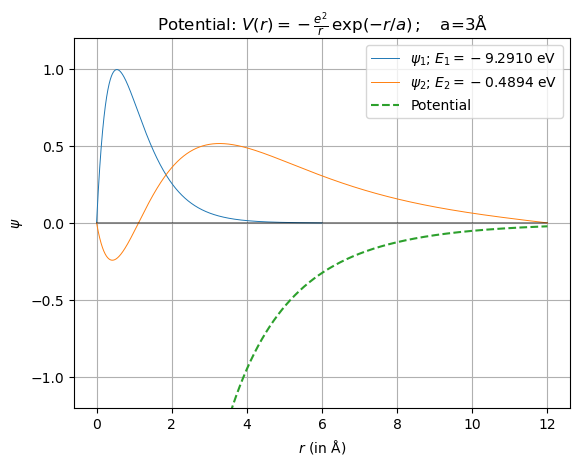

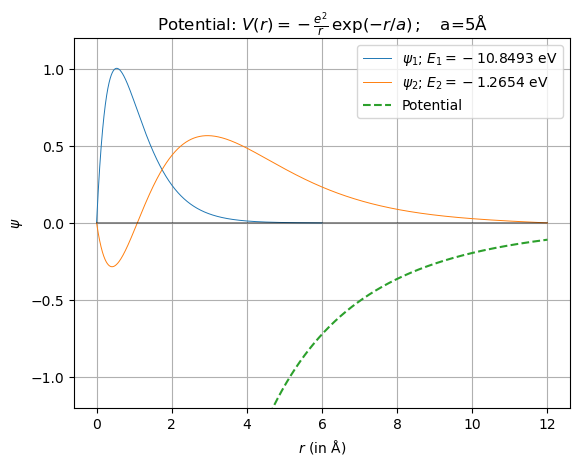

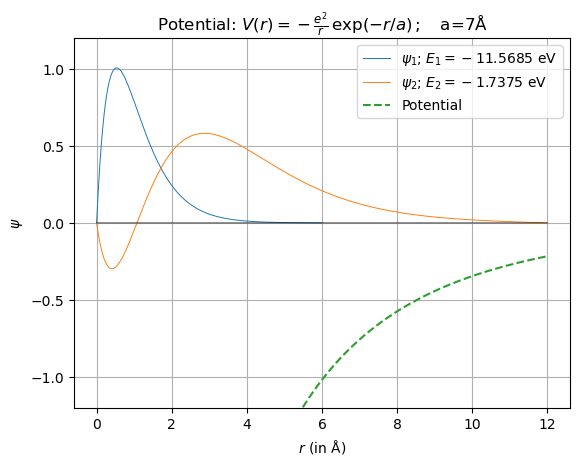

In [99]:
for a1 in range(3):
    screened_Coulomb_pot(a[a1])

## Question 3
$$ V(r) = \frac{1}{2} kr^2 $$

Given constants,
- $m = 940 \,MeV/c^2 $
- $\hbar c = 197.3 \, MeV\,fm $
- $k = 100 \, MeV/fm^2 $

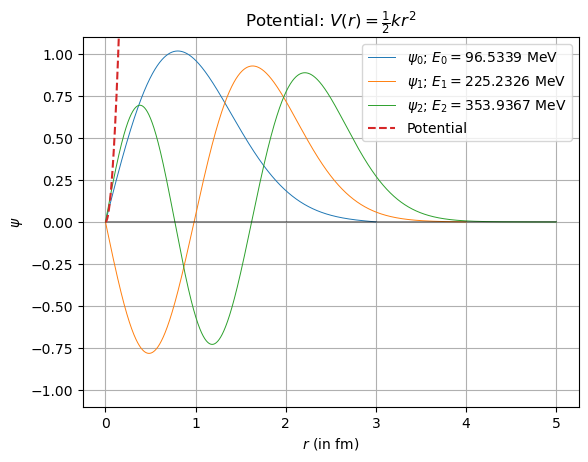

In [100]:
hc = 197.3   # MeV fm
m = 940  # MeV/c2
k = 100  # MeV fm-2

Ac = 2*m/hc**2
def V(r):
    return (1/2)*k*r**2
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-3
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 0, 0, [3,4,5], 0

for nodesn in range(3):
    Emn, Emx = V(r0), V(rN[nodesn])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn}$; $E_{nodesn} = {E:.4f}$ MeV',lw=0.7)
plt.xlabel('$r$ (in fm)')
plt.ylabel('$\psi$')
plt.ylim(-1.1,1.1)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title('Potential: $V(r) = \\frac{1}{2}kr^2$')
plt.grid()
plt.show()

## Question 4
$$ V(r) = \frac{1}{2}kr^2 +\frac{1}{3} br^3 $$

Given constants,
- $m = 940 \,MeV/c^2 $
- $\hbar c = 197.3 \, MeV\,fm $
- $k = 100 \, MeV/fm^2 $
- $ b = 0, 10, 30 \, MeV/fm^3 $

In [101]:
hc = 197.3   # MeV fm
m = 940  # MeV/c2
k = 100  # MeV fm-2
b = [0,10,30] # MeV fm-3

Ac = 2*m/hc**2

def anharmonic_osc(b):
    def V(r):
        return (1/2)*k*r**2 + (1/3)*b*r**3
    def A(E, r):
        return Ac*(V(r)-E)

    def p(r):
        return 0
    def q(E, r):
        return A(E, r)
    def rfn(r):
        return 0

    dr = 1e-3
    tol = 1e-6
    mxitr = 100
    r0, psi0, rN, psiN = 0, 0, [3,4], 0

    for nodesn in range(2):
        Emn, Emx = V(r0), V(rN[nodesn])
        psi1 = psi0 + (-1)**nodesn *1e-4
        E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                        r0, psi0, rN[nodesn], psiN, psi1, dr, nodesn, tol, mxitr)
        if E != None:
            psi = psiNorm(psi, dr)
            r = np.array(r)
            plt.plot(r, psi, label=f'$\psi_{nodesn}$; $E_{nodesn} = {E:.4f}$ MeV',lw=0.7)
    plt.xlabel('$r$ (in fm)')
    plt.ylabel('$\psi$')
    plt.ylim(-1.2,1.4)
    xax = [0 for i in r]
    plt.plot(r,xax,'k', lw=0.5)
    plt.plot(r, V(r), '--', label='Potential')
    plt.legend(loc='best')
    plt.title('Potential: $ V(r) = \\frac{1}{2}kr^2 +\\frac{1}{3} br^3 $'
              +f'\nb={b}')
    plt.grid()
    plt.show()

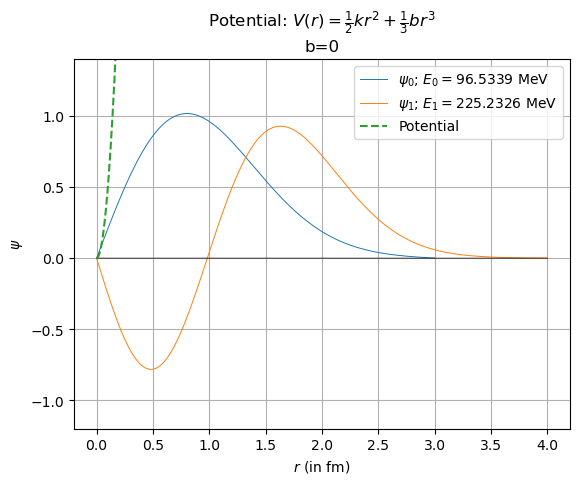

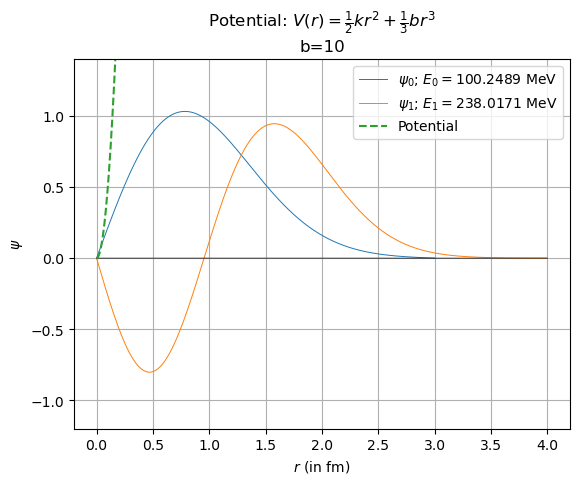

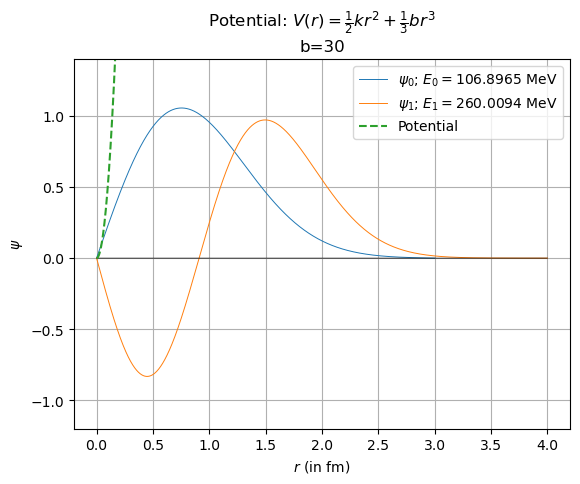

In [102]:
for b1 in range(3):
    anharmonic_osc(b[b1])

## Question 5
$$ V(r) = D(e^{-2\alpha r'} - e^{-\alpha r'})\,;\quad r'=\frac{r-r_0}{r_0} $$

Given constants,
- $m = 940\times 10^6 \, eV/c^2 $
- $\hbar c = 1973 \, eV\, Å $
- $ D = 0.755501 \, eV $
- $ \alpha = 1.44 $
- $ r_0 = 0.131349 \, Å $

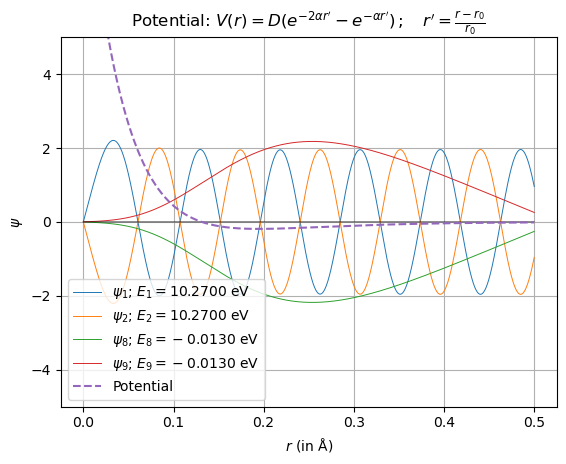

In [103]:
hc = 1973   # eV Å
m = 940e6  # eV/c2
D = 0.755501  # eV
al = 1.44
r_0 = 0.131349  # Å

Ac = 2*m/hc**2
def V(r):
    rp = (r-r_0)/r_0
    return D*(np.exp(-2*al*rp)-np.exp(-al*rp))
def A(E, r):
    return Ac*(V(r)-E)

def p(r):
    return 0
def q(E, r):
    return A(E, r)
def rfn(r):
    return 0

dr = 1e-4
tol = 1e-6
mxitr = 100
r0, psi0, rN, psiN = 0, 0, [0.5,0.5, 0.5,0.5], 0
rNcnt = 0

for nodesn in [0,1,7,8]:
    Emn, Emx = V(r0), V(rN[rNcnt])
    psi1 = psi0 + (-1)**nodesn *1e-4
    E, r, psi = center_diff_eigval(Emn, Emx, p, q, rfn, 
                    r0, psi0, rN[rNcnt], psiN, psi1, dr, nodesn, tol, mxitr)
    rNcnt += 1
    if E != None:
        psi = psiNorm(psi, dr)
        r = np.array(r)
        plt.plot(r, psi, label=f'$\psi_{nodesn+1}$; $E_{nodesn+1} = {E:.4f}$ eV',lw=0.7)
plt.xlabel('$r$ (in Å)')
plt.ylabel('$\psi$')
plt.ylim(-5,5)
xax = [0 for i in r]
plt.plot(r,xax,'k', lw=0.5)
plt.plot(r, V(r), '--', label='Potential')
plt.legend(loc='best')
plt.title("Potential: $ V(r) = D(e^{-2\\alpha r'} - e^{-\\alpha r'}) \,;\quad r'=\\frac{r-r_0}{r_0}$")
plt.grid()
plt.show()